# Spotify Song Suggester 
This week was an amazing experience with a great team of people from Unit 3.  I was responsible for setting up and maintaining Zoom communication and calling the morning meet ups to discuss the day's plan.  I created and maintained the Trello board, ensuring we stayed on task.  Ben found the Kaggle Spotify datasets and I was able to use one of the them to do some EDA (below).  I found how to get the Spotify API tokens and set up access to the API as well as creating the frame work for the basic flask application.  Ben wrote a majority of the code with collaboration from myself and Nick on Zoom calls.  I found the .recommendations() from Spotipy to have Spotify output 5 similar songs to the one the user inserts and Ben implemented it flawlessly.  Nick, Ben and I all contributed to the making of visualizations.  We really wanted to implement a radar plot, but that was more difficult than we thought.  We ended up using a bar graph that Nick made.  I deployed the Heroku app and maintained it's functionality.  This week's project would not have been possible without close collaboration from our Unit 3 team members and has taught me so much about how to work on a team. 

# EDA - Kaggle Spotify Data Set 

In [1]:
# import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading in kaggle spotify csv to explore data 
df = pd.read_csv('/Users/alyssamurray/Documents/Projects/Spotify/SpotifyFeatures.csv')

In [3]:
# 18 features, 232725 entries
df.shape


(232725, 18)

In [4]:
# visualize 1st 5 rows of data 
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
# getting numerical properties of data
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [6]:
# displaying information about columns, nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
# 0 nulls (missing values)
df.isnull().sum().sum()

0

In [8]:
# 14564 unique artists 
df['artist_name'].nunique()

14564

In [9]:
# 148615 unique track names
df['track_name'].nunique()

148615

In [10]:
# 176774 unique track ids (how is this so different from 232725 entries....rpt songs?)
df['track_id'].nunique()

176774

In [11]:
#top artist by popularity of songs
df.groupby('artist_name')['popularity'].sum().sort_values(ascending=False).head(20)

artist_name
Drake                       31703
Chris Brown                 22047
Nobuo Uematsu               19710
Future                      19590
Hans Zimmer                 19439
Eminem                      18876
Giuseppe Verdi              18580
Wolfgang Amadeus Mozart     17785
Howard Shore                17283
Johann Sebastian Bach       16508
Giacomo Puccini             16376
G-Eazy                      16300
John Williams               15585
The Black Keys              15200
Frédéric Chopin             15193
Frank Ocean                 14977
Mac Miller                  14851
Ludwig van Beethoven        14597
Bob Marley & The Wailers    14520
J. Cole                     14483
Name: popularity, dtype: int64

# SPOTIFY API

In [14]:
# imports 
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

In [15]:
# tokens for Spotify API
token = SpotifyClientCredentials(
    client_id="516dcc7dd59a48eb85604f46f2aa134a",
    client_secret="4326ec02ca5e4df6b46066bb774006a4")
# use tokens to call Spotipy for querying 
sp = spotipy.Spotify(auth_manager=token)

In [ ]:
# demo searching for song titles to pull out data needed 
sp.search('Willow')['tracks']['items']

In [ ]:
# learning to use .recommendations as model in case Unit 4 person isn't able to provide the model 
sp.recommendations(seed_tracks='https://open.spotify.com/track/3Uo7WG0vmLQ07WB4BDwy7D?si=67a11fe6d3ee4fcf')

In [17]:
# function to get 5 metrics from a song (danceability, energy, speechiness, acousticness, valence)
def get_list_of_features(song):
    """ Gets all feature metrics of a song
    and returns list of 5 desired ones """
    features = sp.audio_features(song)
    usable_features = []
    usable_features.append(features[0]['danceability'])
    usable_features.append(features[0]['energy'])
    usable_features.append(features[0]['speechiness'])
    usable_features.append(features[0]['acousticness'])
    usable_features.append(features[0]['valence'])

    return usable_features

In [18]:
# calling function on one track id for testing 
get_list_of_features('3Uo7WG0vmLQ07WB4BDwy7D')


[0.392, 0.579, 0.164, 0.835, 0.549]

# Making a bar plot comparing metrics of chosen song with 5 recommended songs

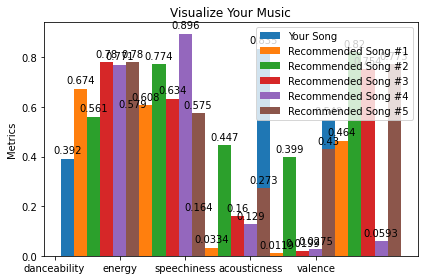

In [29]:
your_song_values = get_list_of_features('3Uo7WG0vmLQ07WB4BDwy7D')
suggested_song_1_values = get_list_of_features('7tGlzXJv6GD5e5qlu5YmDg') # love me
suggested_song_2_values = get_list_of_features('0eK5y1c7WDyWwx6k9SFjbT') # renegade
suggested_song_3_values = get_list_of_features('5IweeQZdY5XEzStLzUJG5t') # purple pills
suggested_song_4_values = get_list_of_features('4uX7M3U4I1nsZ7SFM4XNCn') # kings never die
suggested_song_5_values = get_list_of_features('2g8HN35AnVGIk7B8yMucww') # big poppa

labels = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence']
your_song = your_song_values
recommendation_1 = suggested_song_1_values
recommendation_2 = suggested_song_2_values
recommendation_3 = suggested_song_3_values
recommendation_4 = suggested_song_4_values
recommendation_5 = suggested_song_5_values

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width*1, your_song, width, label='Your Song')
rects2 = ax.bar(x + width*2, recommendation_1, width, label='Recommended Song #1')
rects3 = ax.bar(x + width*3, recommendation_2, width, label='Recommended Song #2')
rects4 = ax.bar(x + width*4, recommendation_3, width, label='Recommended Song #3')
rects5 = ax.bar(x + width*5, recommendation_4, width, label='Recommended Song #4')
rects6 = ax.bar(x + width*6, recommendation_5, width, label='Recommended Song #5')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Visualize Your Music')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)
ax.bar_label(rects6, padding=3)




fig.tight_layout()

# This is a bit too much for one graph.  Ended up using a different graph in final product.

# Trying to implement radar chart...with no luck

In [20]:
# making labels and length of labels for graph
labels = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence']
num_vars = len(labels)

In [21]:
# Split the circle into even parts and save the angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

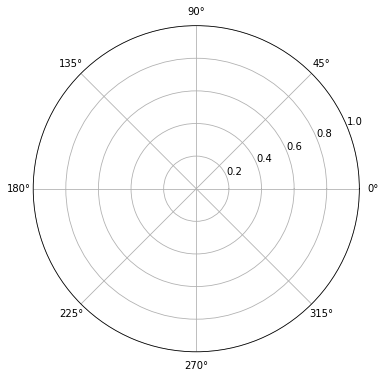

In [22]:
# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

In [ ]:
ax.plot(values, linewidth=1)

plt.show()
# Couldn't get this working and moved a bunch of the code to the bar graph.

# Making blueprint for basic flask app

In [ ]:
# import statement 
from flask import Flask, request
from flask_sqlalchemy import SQLAlchemy


def create_app():
    """ Creates flask application """
    APP = Flask(__name__)

    @APP.route('/')
    def base():
        """ Creates base/home route for front page """
        return "This is home and will have drop down menu of songs from Spotify API"
    
    @APP.route('/song_suggestions')
    def song_suggestor():
        """ Creates song suggestor route """
        return "List of song suggestions goes here"

    # returns app 
    return APP


if __name__ == '__main__':
    create_app().run()